In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
#Season
feature = ['Season','Quantity']
result = ANN(feature)
predict1 = result[0]
actual = result[1]

#Month 
feature = ['Month','Quantity']
result = ANN(feature)
predict2 = result[0]

#Holiday
df = pd.read_csv('feature/feature3.csv')  
feature = ['Holiday','Quantity']
result = ANN(feature)
predict3 = result[0]

#Holiday,Season,Month  
feature = ['Holiday', 'Season', 'Month', 'Quantity']
result = ANN(feature)
predict4 = result[0]

#Holiday,Season,Month,Week 
feature = ['Holiday', 'Season', 'Month', 'Week', 'Quantity']
result = ANN(feature)
predict5 = result[0]

#Holiday,Season,Price,Month,Week  
feature = ['Holiday', 'Season', 'Price', 'Month', 'Week', 'Quantity']
result = ANN(feature)
predict6 = result[0]

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 0.1063
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1021
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0990
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0937
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0911
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0862
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 12/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 13/50
11/11 [==============================

11/11 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 46/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 47/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 48/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 49/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 50/50
2/2 [==============================] - 0s 5ms/step
Epoch 1/50
11/11 [==============================] - 1s 4ms/step - loss: 0.1037
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0844
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0789
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0707
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0

In [81]:
def ANN(feature):
    #Load and preprocess the dataset
    # Load the dataset
    df = pd.read_csv('sale/sale.csv')  # Replace 'your_dataset.csv' with the actual file path or URL

    #seperate dates for future plotting
    dates = pd.to_datetime(df['Date'])

    # Extract the relevant features
    data = df[feature].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Split into input (features) and output (demand) variables
    features = data_scaled[:, :-1]
    demand = data_scaled[:, -1]
    
    #Split the dataset into training and testing sets
    # Determine the train-test split ratio
    train_ratio = 0.8
    train_size = int(len(data) * train_ratio)

    # Split the data into train and test sets
    train_features = features[:train_size]
    train_demand = demand[:train_size]
    train_dates = dates[:train_size]
    test_features = features[train_size:]
    test_demand = demand[train_size:]
    test_dates = dates[train_size:]

    #Build and train the ANN model
    # Build the ANN model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(train_features.shape[1],)))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(train_features, train_demand, epochs=50, batch_size=16, verbose=1)
    
    #Make predictions on the test set
    # Generate predictions on the test set
    predictions = model.predict(test_features)

    # Inverse scale the predictions and actual demand
    predictions = scaler.inverse_transform(np.concatenate((test_features, predictions), axis=1))[:, -1]
    actual_demand = scaler.inverse_transform(np.concatenate((test_features, test_demand.reshape(-1, 1)), axis=1))[:, -1]
    return predictions,actual_demand

In [82]:
def my_LSTM(feature):
    # Load the dataset
    df = pd.read_csv('sale/sale.csv')  # Replace 'your_dataset.csv' with the actual file path or URL

    #seperate dates for future plotting
    dates = pd.to_datetime(df['Date'])

    # Extract the relevant features
    data = df[feature].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Split into input (features) and output (demand) variables
    features = data_scaled[:, :-1]
    demand = data_scaled[:, -1]

    #Split the dataset into training and testing sets
    # Determine the train-test split ratio
    train_ratio = 0.8
    train_size = int(len(data) * train_ratio)

    # Split the data into train and test sets
    train_features = features[:train_size]
    train_demand = demand[:train_size]
    train_dates = dates[:train_size]
    test_features = features[train_size:]
    test_demand = demand[train_size:]
    test_dates = dates[train_size:]

    #Reshape the input data for LSTM
    # Reshape the features data to match LSTM input shape (samples, time steps, features)
    n_features = features.shape[1]
    train_features = train_features.reshape((train_features.shape[0], 1, n_features))
    test_features = test_features.reshape((test_features.shape[0], 1, n_features))

    #Build and train the LSTM model
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(train_features, train_demand, epochs=50, batch_size=16, verbose=1)

    #Make predictions on the test set
    # Generate predictions on the test set
    predictions = model.predict(test_features)

    # Inverse scale the predictions and actual demand
    predictions = scaler.inverse_transform(np.concatenate((test_features.reshape(test_features.shape[0], -1), predictions), axis=1))[:, -1]
    actual_demand = scaler.inverse_transform(np.concatenate((test_features.reshape(test_features.shape[0], -1), test_demand.reshape(-1, 1)), axis=1))[:, -1]

    return predictions,actual_demand

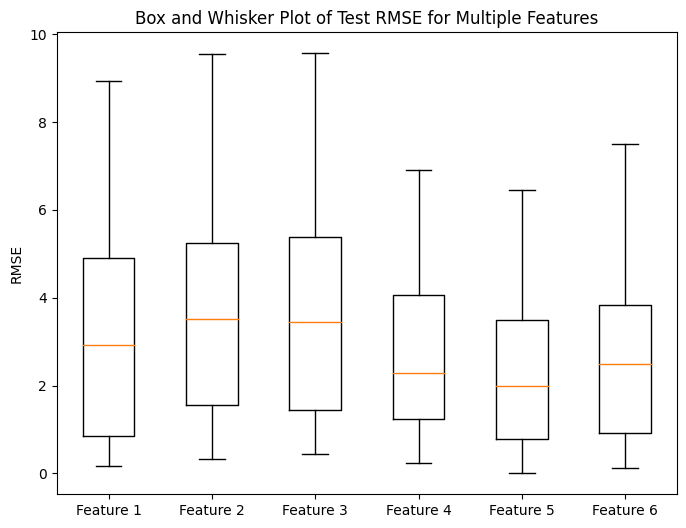

In [44]:
import matplotlib.pyplot as plt

test_rmse_lists = [test_rmse_list(actual,predict1), test_rmse_list(actual,predict2), test_rmse_list(actual,predict3), test_rmse_list(actual,predict4), test_rmse_list(actual,predict5), test_rmse_list(actual,predict6)]
feature_labels = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.boxplot(test_rmse_lists)
ax.set_xticklabels(feature_labels)
ax.set_ylabel('RMSE')
ax.set_title('Box and Whisker Plot of Test RMSE for Multiple Features')
plt.show()

In [43]:
def test_rmse_list(actual_demand,predictions):
    # Calculate the RMSE for each prediction
    test_rmse_list = []
    for i in range(len(predictions)):
        rmse = np.sqrt(mean_squared_error([actual_demand[i]], [predictions[i]]))
        test_rmse_list.append(rmse)
    return test_rmse_list

In [83]:
#Holiday,Season,Month,Week 
feature = ['Holiday', 'Season', 'Month', 'Week', 'Quantity']
result = my_LSTM(feature)
predict_LSTM = result[0]
actual_result = result[1]

#Holiday,Season,Month,Week 
feature = ['Holiday', 'Season', 'Month', 'Week', 'Quantity']
result = ANN(feature)
predict_ANN = result[0]

Epoch 1/50
11/11 [==============================] - 3s 4ms/step - loss: 0.1240
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1001
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0788
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0630
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0432
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0399
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 12/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 13/50
11/11 [==============================

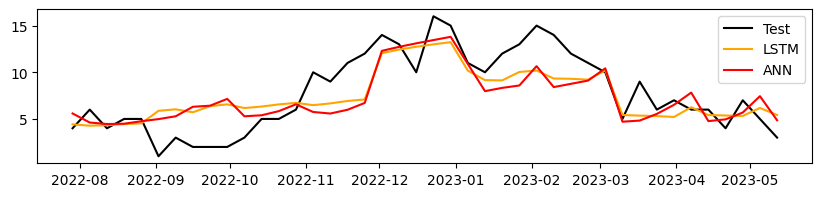

In [85]:
plt.figure(figsize=(10,2))
plt.plot(test_dates,actual_result, color = 'black', label = 'Test')
plt.plot(test_dates,predict_LSTM, color = 'orange', label = 'LSTM')
plt.plot(test_dates,predict_ANN, color = 'red', label = 'ANN')
plt.legend()
plt.show()

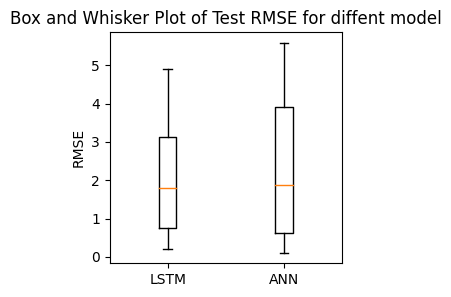

In [90]:
test_rmse_lists = [test_rmse_list(actual_result,predict_LSTM), test_rmse_list(actual_result,predict_ANN)]
feature_labels = ['LSTM', 'ANN']
plt.figure(figsize=(3, 3))
ax = plt.axes()
ax.boxplot(test_rmse_lists)
ax.set_xticklabels(feature_labels)
ax.set_ylabel('RMSE')
ax.set_title('Box and Whisker Plot of Test RMSE for diffent model')
plt.show()

In [94]:
print('LSTM:', np.sqrt(mean_squared_error(actual_result,predict_LSTM)))
print('ANN:', np.sqrt(mean_squared_error(actual_result,predict_ANN)))

LSTM: 2.631730104323004
ANN: 2.8313965484117882


In [23]:
#Load and preprocess the dataset
# Load the dataset
df = pd.read_csv('sale/sale.csv')  # Replace 'your_dataset.csv' with the actual file path or URL

#seperate dates for future plotting
dates = pd.to_datetime(df['Date'])

# Extract the relevant features
data = df[['Holiday', 'Season', 'Month', 'Quantity']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split into input (features) and output (demand) variables
features = data_scaled[:, :-1]
demand = data_scaled[:, -1]


In [26]:
#Split the dataset into training and testing sets
# Determine the train-test split ratio
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

# Split the data into train and test sets
train_features = features[:train_size]
train_demand = demand[:train_size]
train_dates = dates[:train_size]
test_features = features[train_size:]
test_demand = demand[train_size:]
test_dates = dates[train_size:]

In [7]:
#Build and train the ANN model
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_features, train_demand, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
11/11 [==============================] - 1s 4ms/step - loss: 0.1974
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1506
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1140
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0591
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0462
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0437
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 12/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0394
Epoch 13/50
11/11 [==============================

In [8]:
#Make predictions on the test set
# Generate predictions on the test set
predictions = model.predict(test_features)

# Inverse scale the predictions and actual demand
predictions = scaler.inverse_transform(np.concatenate((test_features, predictions), axis=1))[:, -1]
actual_demand = scaler.inverse_transform(np.concatenate((test_features, test_demand.reshape(-1, 1)), axis=1))[:, -1]

# Compare predictions with actual demand
results = pd.DataFrame({'Actual Demand': actual_demand, 'Predicted Demand': predictions})
print(results)


2/2 [==============================] - 0s 6ms/step
    Actual Demand  Predicted Demand
0             4.0          4.548114
1             6.0          4.798398
2             4.0          4.798398
3             5.0          4.798398
4             5.0          4.798398
5             1.0          5.805290
6             3.0          5.805290
7             2.0          4.844383
8             2.0          5.805290
9             2.0          5.805290
10            3.0          6.381525
11            5.0          6.381525
12            5.0          6.381525
13            6.0          6.381525
14           10.0          6.957760
15            9.0          6.957760
16           11.0          6.957760
17           12.0          6.957760
18           14.0         11.732223
19           13.0         11.732223
20           10.0         11.732223
21           16.0         11.732223
22           15.0         11.732223
23           11.0         11.053309
24           10.0          9.362044
25           

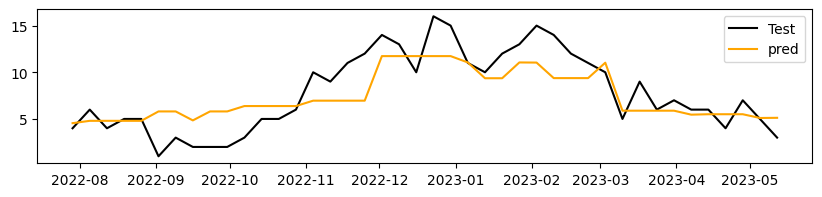

In [30]:
plt.figure(figsize=(10,2))
plt.plot(test_dates,actual_demand, color = 'black', label = 'Test')
plt.plot(test_dates,predictions, color = 'orange', label = 'pred')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

# Assuming you have the actual_demand and predictions arrays

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_demand, predictions))

print('RMSE:', rmse)

RMSE: 2.487150270651187
